### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

Shape: (847, 16)
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0    

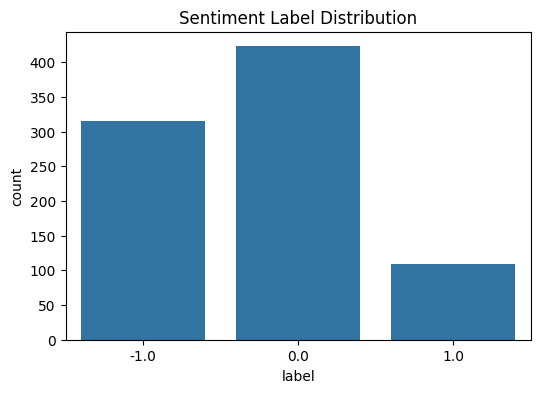

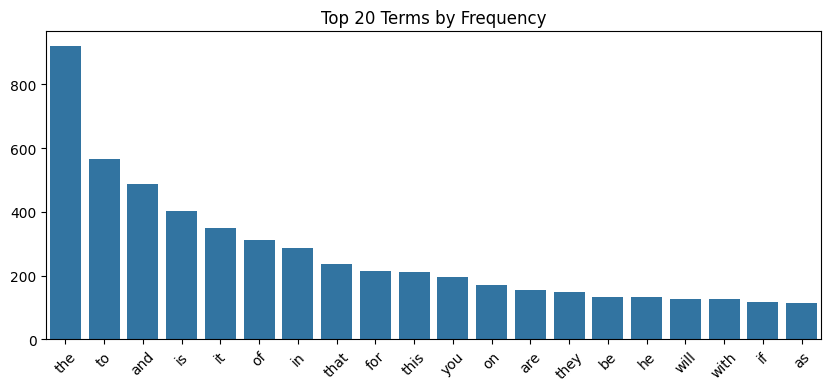

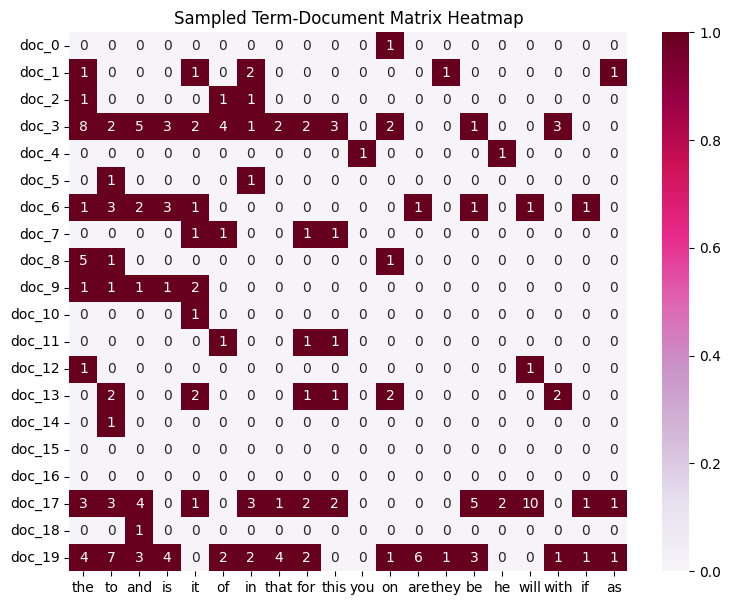

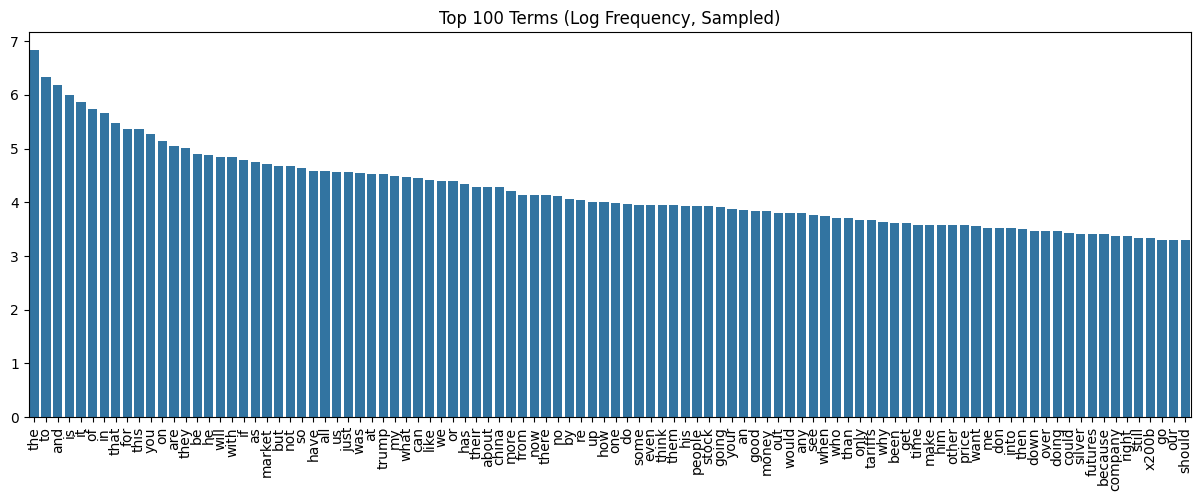

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import math

# 1. Load the new dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
print("Shape:", df.shape)
print(df.head())

# 2. Select relevant columns (text and label)
df = df[['text', 'label']]
print(df.head())

# 3. Basic statistics
print("Label distribution:\n", df['label'].value_counts())

# 4. Tokenize and vectorize text
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['text'])
print("Term-document matrix shape:", X_counts.shape)

# 5. Visualize label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Sentiment Label Distribution')
plt.show()

# 6. Visualize term frequencies (top 20 terms)
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_n = 20
top_idx = np.argsort(term_frequencies)[::-1][:top_n]
top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

plt.figure(figsize=(10,4))
sns.barplot(x=top_terms, y=top_freqs)
plt.xticks(rotation=45)
plt.title('Top 20 Terms by Frequency')
plt.show()

# 7. Show a sample of the term-document matrix (first 20 docs × first 20 terms)
plot_z = X_counts[:20, top_idx].toarray()
plot_x = top_terms
plot_y = [f"doc_{i}" for i in range(20)]
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.title("Sampled Term-Document Matrix Heatmap")
plt.show()

#Extra: replicating exercise 15 which includes sampling, sorting, and log transformation

# Steps:
# 1. Sample up to 1000 (all if they are < 1000) documents for efficiency (sampling step)
n_sample = min(1000, len(df))
sample_df = df.sample(n=n_sample, random_state=42)
sample_counts = count_vect.transform(sample_df['text'])

# 2. Compute term frequencies for the sample
sample_term_freqs = np.asarray(sample_counts.sum(axis=0)).ravel()

# 3. Sort terms by frequency (sorting step)
sorted_indices = np.argsort(sample_term_freqs)[::-1]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices][:100]
sorted_freqs = sample_term_freqs[sorted_indices][:100]

# 4. Apply log transformation to frequencies (log transformation step)
sorted_freqs_log = [math.log(i) if i > 0 else 0 for i in sorted_freqs]

# 5. Plot the log-transformed frequencies
plt.figure(figsize=(15, 5))
sns.barplot(x=sorted_terms, y=sorted_freqs_log)
plt.xticks(rotation=90)
plt.title('Top 100 Terms (Log Frequency, Sampled)')
plt.show()

# Comment:
# - Sampling reduces computational load and helps visualize a representative subset.
# - Sorting by frequency highlights the most common terms.
# - Log transformation compresses the frequency range, making less frequent terms more visible.
# - This approach reveals the long tail effect and helps spot subtle patterns in term usage.

# Phase 2

In [2]:
### Begin Assignment Here